In [3]:
from fastcore.all import *
from fastai.vision.all import *
from pathlib import Path
from duckduckgo_search import ddg_images
from fastdownload import download_url

In [14]:
# Create some Destinations to save images of pipes of different materials
c_dests = []
p_dests = []
m_dests = []
for i in range(50): # We will try to train on first 50 pipe images
    dest = "img_"+str(i)+".jpg"
    c_dests.append("c_pipes/"+dest)
    p_dests.append("p_pipes/"+dest)
    m_dests.append("m_pipes/"+dest)
for i in range(51,81): # We will try to test on the next 30 pipe images
    dest = "img_"+str(i)+".jpg"
    c_dests.append("c_pipes2/"+dest)
    p_dests.append("p_pipes2/"+dest)
    m_dests.append("m_pipes2/"+dest)

In [ ]:
# Search for URLs of pipe images of different materials
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

urls = search_images('metal pipe', max_images=100)
urlsP = search_images('plastic pipe', max_images=100)
urlsC = search_images('concrete pipe', max_images=100)

In [14]:
for i in range(0,81): # We will try to download all the images to the correct locations as JPG files.
    try:
        download_url(urls[i], m_dests[i], show_progress=False)
        download_url(urlsP[i], p_dests[i], show_progress=False)
        download_url(urlsC[i], c_dests[i], show_progress=False)
    except: # If it is not possible to download the image, the image will be skipped
        pass

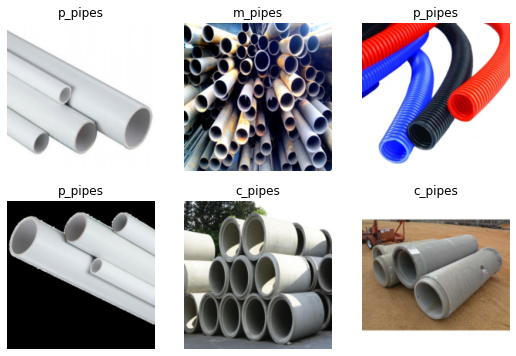

In [5]:
path = Path('pipe_images/') # Specify the path to the pipe images for training
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32) #Load the images

dls.show_batch(max_n= 6) #Display some of the images

In [6]:
# We are doing transfer learning here using a pretrained resnet18 model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
learn.save("fst_model3") # After training the model, we are saving it for later use

Path('models/fst_model2.pth')

In [9]:
learn.export("material_model.pkl") #save model

In [10]:
#learn2 = load_learner("model_export.pkl") #load model

Initial testing on random images. This produced correct results in both cases so we shall move to further testing.

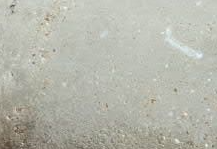

In [13]:
dest = 'img.png'
im = Image.open(dest)
im.to_thumb(256,256)

In [14]:
learn.predict(PILImage.create('img.png'))

('c_pipes', TensorBase(0), TensorBase([0.6995, 0.1319, 0.1685]))

In [15]:
dest = 'p_pipe2.jpg'
im = Image.open(dest)
im.to_thumb(256,256)
learn.predict(PILImage.create(dest))

('p_pipes', TensorBase(2), TensorBase([0.0235, 0.0367, 0.9398]))

We are testing the accuracy of metal pipes here. We get ~83.3% accuracy.

In [16]:
correct = 0
for i in range(51,80):
    dest = f'm_pipes2/img_{i}.jpg'
    im = Image.open(dest)
    im.to_thumb(256,256)
    pred, _, _ = learn.predict(PILImage.create(dest))

    if pred == "m_pipes":
        correct +=1
correct/30

0.8333333333333334

We are testing Plastic pipes. We get 28% accuracy. Some images could not be downloaded so we had to separate the testing loops

In [17]:
correct = 0
for i in range(50,57):
    dest = f'p_pipes2/img_{i}.jpg'
    im = Image.open(dest)
    im.to_thumb(256,256)
    pred, _, _ = learn.predict(PILImage.create(dest))
    print(pred)
    if pred == "p_pipes":
        correct +=1
for i in range(58,63):
    dest = f'p_pipes2/img_{i}.jpg'
    im = Image.open(dest)
    im.to_thumb(256,256)
    pred, _, _ = learn.predict(PILImage.create(dest))
    print(pred)
    if pred == "p_pipes":
        correct +=1
for i in range(64,80):
    dest = f'p_pipes2/img_{i}.jpg'
    im = Image.open(dest)
    im.to_thumb(256,256)
    pred, _, _ = learn.predict(PILImage.create(dest))
    print(pred)
    if pred == "p_pipes":
        correct +=1
correct/28

c_pipes


m_pipes


p_pipes


p_pipes


m_pipes


m_pipes


m_pipes


m_pipes


c_pipes


p_pipes


m_pipes


m_pipes


m_pipes


m_pipes


m_pipes


p_pipes


m_pipes


p_pipes


m_pipes


m_pipes


m_pipes


p_pipes


m_pipes


p_pipes


m_pipes


c_pipes


p_pipes


m_pipes


0.2857142857142857

We are testing on concrete pipes. We get 82.1% accuracy.

In [18]:
correct = 0
for i in range(51,70):
    dest = f'c_pipes2/img_{i}.jpg'
    im = Image.open(dest)
    im.to_thumb(256,256)
    pred, _, _ = learn.predict(PILImage.create(dest))
    print(pred)
    if pred == "c_pipes":
        correct +=1

dest = f'c_pipes2/img_71.jpg'
im = Image.open(dest)
im.to_thumb(256,256)
pred, _, _ = learn.predict(PILImage.create(dest))
print(pred)
if pred == "c_pipes":
    correct +=1
for i in range(73,80):
    dest = f'c_pipes2/img_{i}.jpg'
    im = Image.open(dest)
    im.to_thumb(256,256)
    pred, _, _ = learn.predict(PILImage.create(dest))
    print(pred)
    if pred == "c_pipes":
        correct +=1
correct/28

c_pipes


m_pipes


c_pipes


c_pipes


c_pipes


m_pipes


c_pipes


c_pipes


c_pipes


c_pipes


m_pipes


c_pipes


c_pipes


c_pipes


m_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


c_pipes


0.8214285714285714